# Z3 API in Python

Z3 is a high performance theorem prover developed at Microsoft Research. Z3 is used in many applications such as: software/hardware verification and testing, constraint solving, analysis of hybrid systems, security, biology (in silicon analysis), and geometrical problems.

This tutorial demonstrates the main capabilities of Z3Py: the Z3 API in Python. No Python background is needed to read this tutorial. However, it is useful to learn Python (a fun language!) at some point, and there are many excellent free resources for doing so (Python Tutorial).

The Z3 distribution also contains the C, C++, .Net, Java and OCaml APIs. The source code of Z3Py is available in the Z3 distribution on https://github.com/z3prover/z3.git where you are invited to download, use and update the code, add pull requests and file issues on usability, bugs and features.


## First things first
Import Z3


In [ ]:
from z3 import *

# Getting Started

Let us start with the following simple example:





In [ ]:
x = Int('x')
y = Int('y')
solve(x > 2, y < 10, x + 2*y == 7)

The function Int('x') creates an integer variable in Z3 named x. 
The solve function solves a system of constraints.
The example above uses two variables x and y, and three constraints. 
Z3Py like Python uses = for assignment. 
The operators <, <=, >, >=, == and != for comparison. 
In the example above, the expression x + 2*y == 7 is a Z3 constraint.
Z3 can solve and crunch formulas.

The next examples show how to use the Z3 formula/expression simplifier.



In [ ]:
x = Int('x')
y = Int('y')
print(simplify(x + y + 2*x + 3))
print(simplify(x < y + x + 2))
print(simplify(And(x + 1 >= 3, x**2 + x**2 + y**2 + 2 >= 5)))

By default, Z3Py (for the web) displays formulas and expressions using mathematical notation. As usual, ∧ is the logical and, ∨ is the logical or, and so on. The command set_option(html_mode=False) makes all formulas and expressions to be displayed in Z3Py notation. This is also the default mode for the offline version of Z3Py that comes with the Z3 distribution.

In [ ]:
x = Int('x')
y = Int('y')
print(x**2 + y**2 >= 1)
set_option(html_mode=False)
print(x**2 + y**2 >= 1)

### html mode: use copy paste into a markdown-cell
After execution

In [ ]:
set_option(html_mode=True)
print(x**2 + y**2 >= 1)

### copied from the printed result:
x<sup>2</sup> + y<sup>2</sup> &ge; 1

Z3 provides functions for traversing expressions.

In [ ]:
x = Int('x')
y = Int('y')
n = x + y >= 3
print("num args: ", n.num_args())
print("children: ", n.children())
print("1st child:", n.arg(0))
print("2nd child:", n.arg(1))
print("operator: ", n.decl())
print("op name:  ", n.decl().name())

Z3 provides all basic mathematical operations. 
Z3Py uses the same operator precedence of the Python language. 
Like Python, ** is the power operator. 
Z3 can solve nonlinear polynomial constraints.

In [ ]:
x = Real('x')
y = Real('y')
solve(x**2 + 0.12 * y**2 > 3, x**3 + y < 5)

The procedure Real('x') creates the real variable x. Z3Py can represent arbitrarily large integers, rational numbers (like in the example above), and irrational algebraic numbers. An irrational algebraic number is a root of a polynomial with integer coefficients. Internally, Z3 represents all these numbers precisely. The irrational numbers are displayed in decimal notation for making it easy to read the results.

In [ ]:
x = Real('x')
y = Real('y')
solve(x**2 + y**2 == 3, x**3 == 2)

set_option(precision=30)
print("Solving, and displaying result with 30 decimal places")
solve(x**2 + y**2 == 3, x**3 == 2)

# The procedure <font color='green'>set_option</font> is used to configure the Z3 environment. 
It is used to set global configuration options such as how the result is displayed. The option set_option(precision=30) sets the number of decimal places used when displaying results. 

The <font color='red' size=18>?</font> mark in 1.259921049894873164767210607278? indicates the output is truncated.

The following example demonstrates a common mistake. The expression 3/2 is a Python integer and not a Z3 rational number. The example also shows different ways to create rational numbers in Z3Py. The procedure Q(num, den) creates a Z3 rational where num is the numerator and den is the denominator.
The RealVal(1) creates a Z3 real number representing 
the number 1.

In [ ]:
print(1/3)
print(RealVal(1)/3)

x = Real('x')
print(x + 1/3)
print(x + "1/3")
print(x + 0.25)



Rational numbers can also be displayed in decimal
notation.

In [ ]:
x = Real('x')
solve(3*x == 1)

In [ ]:

set_option(rational_to_decimal=True)
solve(3*x == 1)

set_option(precision=20)
solve(3*x == 1)
set_option(rational_to_decimal=False)
solve(6*x == 37)

A system of constraints may not have a solution.
In this case, we say the system is unsatisfiable.

In [ ]:
x = Real('x')
solve(x > 4, x < 0)


Like in Python, comments begin with the hash character # and are terminated by the end of line. Z3Py does not support comments that span more than one line.
Boolean Logic

In [ ]:
set_option(html_mode=False)
# This is a comment
x = Real('x') # comment: creating x
print(x**2 + 2*x + 2) # comment: printing polynomial)

# Boolean Logic

Z3 supports Boolean operators: And, Or, Not, Implies (implication), If (if-then-else). 
Bi-implications are represented using equality ==. 
The following example shows how to solve
a simple set of Boolean constraints.


In [ ]:
p = Bool('p')
q = Bool('q')
r = Bool('r')
solve(Implies(p, q), r == Not(q), Or(Not(p), r))

The Python Boolean constants True and False
can be used to build Z3 Boolean expressions.


In [ ]:
p = Bool('p')
q = Bool('q')
print(And(p, q, True))
print(simplify(And(p, q, True)))
print(simplify(And(p, False)))

The following example uses a combination of polynomial and Boolean constraints.

In [ ]:
p = Bool('p')
x = Real('x')
solve(Or(x < 5, x > 10), Or(p, x**2 == 2), Not(p))

# Solvers


Z3 provides different solvers. The command solve, used in the previous examples, is implemented using the Z3 solver API. The implementation can be found in the file z3.py in the Z3 distribution. The following example demonstrates the basic Solver API.


In [ ]:
x = Int('x')
y = Int('y')

s = Solver()
print(s)

s.add(x > 10, y == x + 2)
print(s)
print("Solving constraints in the solver s ...")
print(s.check())

print("Create a new scope...")
s.push()
s.add(y < 11)
print(s)
print("Solving updated set of constraints...")
print(s.check())

print("Restoring state...")
s.pop()
print(s)
print("Solving restored set of constraints...")
print(s.check())

# Info ...
The command Solver() creates a general purpose solver. Constraints can be added using the method add. We say the constraints have been asserted in the solver. The method check() solves the asserted constraints. The result is sat (satisfiable) if a solution was found. The result is unsat (unsatisfiable) if no solution exists. We may also say the system of asserted constraints is infeasible. Finally, a solver may fail to solve a system of constraints and unknown is returned.

In some applications, we want to explore several similar problems that share several constraints. We can use the commands push and pop for doing that. Each solver maintains a stack of assertions. The command push creates a new scope by saving the current stack size. The command pop removes any assertion performed between it and the matching push. The check method always operates on the content of solver assertion stack.

The following example shows an example that Z3 cannot solve. The solver returns unknown in this case. Recall that Z3 can solve nonlinear polynomial constraints, but 2**x is not a polynomial.


In [ ]:
x = Real('x')
s = Solver()
s.add(2**x == 3)
print(s.check())


The following example shows how to traverse the constraints asserted into a solver, and how to collect performance statistics for the check method.


In [ ]:
x = Real('x')
y = Real('y')
s = Solver()
s.add(x > 1, y > 1, Or(x + y > 3, x - y < 2))
print("asserted constraints...")
for c in s.assertions():
    print(c)

print(s.check())
print("statistics for the last check method...")
print(s.statistics())
# Traversing statistics
for k, v in s.statistics():
    print("%s : %s" % (k, v))

The command check returns sat when Z3 finds a solution for the set of asserted constraints. We say Z3 satisfied the set of constraints. We say the solution is a model for the set of asserted constraints. A model is an interpretation that makes each asserted constraint true. 

### The following example shows the basic methods for inspecting models.


In [ ]:
x, y, z = Reals('x y z')
s = Solver()
s.add(x > 1, y > 1, x + y > 3, z - x < 10)
print(s.check())

m = s.model()
print("x = %s" % m[x])

print("traversing model...")
for d in m.decls():
    print("%s = %s" % (d.name(), m[d]))


In the example above, the function Reals('x y z') creates the variables. x, y and z. It is shorthand for:


In [ ]:
x = Real('x')
y = Real('y')
z = Real('z')

The expression m[x] returns the interpretation of x in the model m. The expression "%s = %s" % (d.name(), m[d]) returns a string where the first %s is replaced with the name of d (i.e., d.name()), and the second %s with a textual representation of the interpretation of d (i.e., m[d]). Z3Py automatically converts Z3 objects into a textual representation when needed.

# Arithmetic

Z3 supports real and integer variables. They can be mixed in a single problem. Like most programming languages, Z3Py will automatically add coercions converting integer expressions to real ones when needed. The following example demonstrates different ways to declare integer and real variables.

In [ ]:
x = Real('x')
y = Int('y')
a, b, c = Reals('a b c')
s, r = Ints('s r')
print(x + y + 1 + (a + s))
print(ToReal(y) + c)

The function ToReal casts an integer expression into a real expression.


Z3Py supports all basic arithmetic operations.


In [ ]:
a, b, c = Ints('a b c')
d, e = Reals('d e')
solve(a > b + 2,
      a == 2*c + 10,
      c + b <= 1000,
      d >= e)


The command simplify applies simple transformations on Z3 expressions.

In [ ]:
x, y = Reals('x y')
# Put expression in sum-of-monomials form
t = simplify((x + y)**3, som=True)
print(t)
# Use power operator
t = simplify(t, mul_to_power=True)
print(t)


The command help_simplify() prints all available options. Z3Py allows users to write option in two styles. The Z3 internal option names start with : and words are separated by -. These options can be used in Z3Py. Z3Py also supports Python-like names, where : is suppressed and - is replaced with _. The following example demonstrates how to use both styles.

In [ ]:
x, y = Reals('x y')
# Using Z3 native option names
print(simplify(x == y + 2, ':arith-lhs', True))
# Using Z3Py option names
print(simplify(x == y + 2, arith_lhs=True))

print("\nAll available options:")
help_simplify()

# large numbers
Z3Py supports arbitrarily large numbers. The following example demonstrates how to perform basic arithmetic using larger integer, rational and irrational numbers. Z3Py only supports algebraic irrational numbers. Algebraic irrational numbers are sufficient for presenting the solutions of systems of polynomial constraints. Z3Py will always display irrational numbers in decimal notation since it is more convenient to read. The internal representation can be extracted using the method sexpr(). It displays Z3 internal representation for mathematical formulas and expressions in s-expression (Lisp-like) notation.


In [ ]:
x, y = Reals('x y')
solve(x + 10000000000000000000000 == y, y > 20000000000000000)

print(Sqrt(2) + Sqrt(3))
print(simplify(Sqrt(2) + Sqrt(3)))
print(simplify(Sqrt(2) + Sqrt(3)).sexpr())
# The sexpr() method is available for any Z3 expression
print((x + Sqrt(y) * 2).sexpr())


# Machine Arithmetic


Modern CPUs and main-stream programming languages use arithmetic over fixed-size bit-vectors. Machine arithmetic is available in Z3Py as Bit-Vectors. They implement the precise semantics of unsigned and of signed two-complements arithmetic.

The following example demonstrates how to create bit-vector variables and constants. The function BitVec('x', 16) creates a bit-vector variable in Z3 named x with 16 bits. For convenience, integer constants can be used to create bit-vector expressions in Z3Py. The function BitVecVal(10, 32) creates a bit-vector of size 32 containing the value 10.


In [ ]:
x = BitVec('x', 16)
y = BitVec('y', 16)
print(x + 2)
# Internal representation
print((x + 2).sexpr())

# -1 is equal to 65535 for 16-bit integers 
print(simplify(x + y - 1))

# Creating bit-vector constants
a = BitVecVal(-1, 16)
b = BitVecVal(65535, 16)
print(simplify(a == b))

a = BitVecVal(-1, 32)
b = BitVecVal(65535, 32)
# -1 is not equal to 65535 for 32-bit integers 
print(simplify(a == b))

# In contrast to programming languages, such as
C, C++, C#, Java, there is no distinction between signed and unsigned bit-vectors as numbers. Instead, Z3 provides special signed versions of arithmetical operations where it makes a difference whether the bit-vector is treated as signed or unsigned. In Z3Py, the operators <, <=, >, >=, /, % and >> correspond to the signed versions. The corresponding unsigned operators are ULT, ULE, UGT, UGE, UDiv, URem and LShR.


In [ ]:
# Create to bit-vectors of size 32
x, y = BitVecs('x y', 32)

solve(x + y == 2, x > 0, y > 0)



In [ ]:
# Bit-wise operators
# & bit-wise and
# | bit-wise or
# ~ bit-wise not
solve(x & y == ~y)

solve(x < 0)

# using unsigned version of < 
solve(ULT(x, 0))

The operator >> is the arithmetic shift right, and << is the shift left. 

The logical shift right is the operator LShR.



In [ ]:
 # Create to bit-vectors of size 32
x, y = BitVecs('x y', 32)

solve(x >> 2 == 3)

solve(x << 2 == 3)

solve(x << 2 == 24)

# Functions


Unlike programming languages, where functions have side-effects, can throw exceptions, or never return, functions in Z3 have no side-effects and are total. That is, they are defined on all input values. This includes functions, such as division. Z3 is based on first-order logic.

Given a constraints such as x + y > 3, we have been saying that x and y are variables. In many textbooks, x and y are called uninterpreted constants. That is, they allow any interpretation that is consistent with the constraint x + y > 3.

More precisely, function and constant symbols in pure first-order logic are uninterpreted or free, which means that no a priori interpretation is attached. This is in contrast to functions belonging to the signature of theories, such as arithmetic where the function + has a fixed standard interpretation (it adds two numbers). Uninterpreted functions and constants are maximally flexible; they allow any interpretation that is consistent with the constraints over the function or constant.

To illustrate uninterpreted functions and constants let us the uninterpreted integer constants (aka variables) x, y. Finally let f be an uninterpreted function that takes one argument of type (aka sort) integer and results in an integer value. The example illustrates how one can force an interpretation where f applied twice to x results in x again, but f applied once to x is different from x.


In [ ]:
x = Int('x')
y = Int('y')
f = Function('f', IntSort(), IntSort())
solve(f(f(x)) == x, f(x) == y, x != y)


The solution (interpretation) for f should be read as f(0) is 1, f(1) is 0, 

and f(a) is 1 for all a different from 0 and 1.

In Z3, we can also evaluate expressions in the model for a system of constraints. The following example shows how to use the evaluate method.

In [ ]:
x = Int('x')
y = Int('y')
f = Function('f', IntSort(), IntSort())
s = Solver()
s.add(f(f(x)) == x, f(x) == y, x != y)
print(s.check())
m = s.model()
print("f(f(x)) =", m.evaluate(f(f(x))))
print("f(x)    =", m.evaluate(f(x)))

In [ ]:
 
#In Z3, we can also evaluate expressions in the model for a system of constraints. The following example shows how to use the evaluate method.

x = Int('x')
y = Int('y')
f = Function('f', IntSort(), IntSort())
s = Solver()
s.add(f(f(x)) == x, f(x) == y, x != y)
print(s.check())
m = s.model()
print("f(f(x)) =", m.evaluate(f(f(x))))
print("f(x)    =", m.evaluate(f(x)))


# Satisfiability and Validity

A formula/constraint F is valid if F always evaluates to true for any assignment of appropriate values to its uninterpreted symbols. A formula/constraint F is satisfiable if there is some assignment of appropriate values to its uninterpreted symbols under which F evaluates to true. Validity is about finding a proof of a statement; satisfiability is about finding a solution to a set of constraints. Consider a formula F containing a and b. We can ask whether F is valid, that is whether it is always true for any combination of values for a and b. If F is always true, then Not(F) is always false, and then Not(F) will not have any satisfying assignment (i.e., solution); that is, Not(F) is unsatisfiable. That is, F is valid precisely when Not(F) is not satisfiable (is unsatisfiable). Alternately, F is satisfiable if and only if Not(F) is not valid (is invalid). The following example proves the deMorgan's law.

The following example redefines the Z3Py function prove that receives a formula as a parameter. This function creates a solver, adds/asserts the negation of the formula, and check if the negation is unsatisfiable. The implementation of this function is a simpler version of the Z3Py command prove.


In [ ]:

p, q = Bools('p q')
demorgan = And(p, q) == Not(Or(Not(p), Not(q)))
print(demorgan)

def prove(f):
    s = Solver()
    s.add(Not(f))
    if s.check() == unsat:
        print("proved")
    else:
        print("failed to prove")

print("Proving demorgan...")
prove(demorgan)

# List comprehension

Python supports list comprehensions. List comprehensions provide a concise way to create lists. They can be used to create Z3 expressions and problems in Z3Py. The following example demonstrates how to use Python list comprehensions in Z3Py.



In [ ]:

# Create list [1, ..., 5] 
print([ x + 1 for x in range(5) ])

# Create two lists containing 5 integer variables
X = [ Int('x%s' % i) for i in range(5) ]
Y = [ Int('y%s' % i) for i in range(5) ]
print(X)

# Create a list containing X[i]+Y[i]
X_plus_Y = [ X[i] + Y[i] for i in range(5) ]
print(X_plus_Y)

# Create a list containing X[i] > Y[i]
X_gt_Y = [ X[i] > Y[i] for i in range(5) ]
print(X_gt_Y)

print(And(X_gt_Y))

# Create a 3x3 "matrix" (list of lists) of integer variables
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(3) ]
      for i in range(3) ]
pp(X)



In the example above, the expression "x%s" % i returns a string where %s is replaced with the value of i.

The command pp is similar to print, but it uses Z3Py formatter for lists and tuples instead of Python's formatter.

Z3Py also provides functions for creating vectors of Boolean, Integer and Real variables. These functions are implemented using list comprehensions.


In [ ]:
X = IntVector('x', 5)
Y = RealVector('y', 5)
P = BoolVector('p', 5)
print(X)
print(Y)
print(P)
print([ y**2 for y in Y ])
print(Sum([ y**2 for y in Y ]))

# Kinematic equations

In high school, students learn the kinematic equations. These equations describe the mathematical relationship between displacement (d), time (t), acceleration (a), initial velocity (v_i) and final velocity (v_f). In Z3Py notation, we can write these equations as:

In [ ]:
a, t ,v_i, v_f = Reals('a t v__i v__f') #missing in HTML?
d == v_i * t + (a*t**2)/2,
v_f == v_i + a*t


In [ ]:
v_f

## Problem 1

Ima Hurryin is approaching a stoplight moving with a velocity of 30.0 m/s. The light turns yellow, and Ima applies the brakes and skids to a stop. If Ima's acceleration is -8.00 m/s2, then determine the displacement of the car during the skidding process.

In [ ]:


d, a, t, v_i, v_f = Reals('d a t v__i v__f')

equations = [
   d == v_i * t + (a*t**2)/2,
   v_f == v_i + a*t,
]
print("Kinematic equations:")
print(equations)

# Given v_i, v_f and a, find d
problem = [
    v_i == 30,
    v_f == 0,
    a   == -8
]
print("Problem:")
print(problem)

print("Solution:")
solve(equations + problem)

## Problem 2

Ben Rushin is waiting at a stoplight. When it finally turns green, Ben accelerated from rest at a rate of a 6.00 m/s2 for a time of 4.10 seconds. Determine the displacement of Ben's car during this time period.


In [ ]:
d, a, t, v_i, v_f = Reals('d a t v__i v__f')

equations = [
   d == v_i * t + (a*t**2)/2,
   v_f == v_i + a*t,
]

# Given v_i, t and a, find d
problem = [
    v_i == 0,
    t   == 4.10,
    a   == 6
]

solve(equations + problem)

# Display rationals in decimal notation
set_option(rational_to_decimal=True)

solve(equations + problem)

# Bit Tricks

Some low level hacks are very popular with C programmers. We use some of these hacks in the Z3 implementation.

Power of two

This hack is frequently used in C programs (Z3 included) to test whether a machine integer is a power of two. We can use Z3 to prove it really works. The claim is that x != 0 && !(x & (x - 1)) is true if and only if x is a power of two.


In [ ]:
x      = BitVec('x', 32)
powers = [ 2**i for i in range(32) ]
fast   = And(x != 0, x & (x - 1) == 0)
slow   = Or([ x == p for p in powers ])
print(fast)
prove(fast == slow)

print("trying to prove buggy version...")
fast   = x & (x - 1) == 0
prove(fast == slow)


# Opposite signs

The following simple hack can be used to test whether two machine integers have opposite signs.


In [ ]:

x      = BitVec('x', 32)
y      = BitVec('y', 32)

# Claim: (x ^ y) < 0 iff x and y have opposite signs
trick  = (x ^ y) < 0

# Naive way to check if x and y have opposite signs
opposite = Or(And(x < 0, y >= 0),
              And(x >= 0, y < 0))

prove(trick == opposite)

# Puzzles

## Dog, Cat and Mouse

Consider the following puzzle. Spend exactly 100 dollars and buy exactly 100 animals. Dogs cost 15 dollars, cats cost 1 dollar, and mice cost 25 cents each. You have to buy at least one of each. How many of each should you buy?


In [ ]:
# Create 3 integer variables
dog, cat, mouse = Ints('dog cat mouse')
solve(dog >= 1,   # at least one dog
      cat >= 1,   # at least one cat
      mouse >= 1, # at least one mouse
      # we want to buy 100 animals
      dog + cat + mouse == 100,
      # We have 100 dollars (10000 cents):
      #   dogs cost 15 dollars (1500 cents), 
      #   cats cost 1 dollar (100 cents), and 
      #   mice cost 25 cents 
      1500 * dog + 100 * cat + 25 * mouse == 10000)

## Sodoku

<p><a target="_blank" href="http://www.dailysudoku.com/sudoku/">Sudoku</a>is a very popular puzzle. The goal is to insert the numbers in the boxes to satisfy only one condition: each row, column and 3x3 box must contain the digits 1 through 9 exactly once.
    
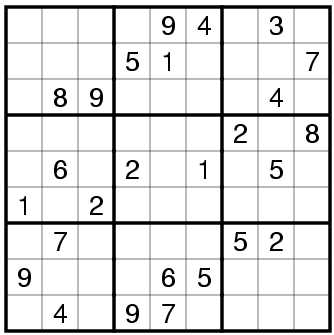
    
The following example encodes the sudoku problem in Z3. Different sudoku instances can be solved by modifying the matrix instance. This example makes heavy use of list comprehensions available in the Python programming language.


In [ ]:

 # 9x9 matrix of integer variables
X = [ [ Int("x_%s_%s" % (i+1, j+1)) for j in range(9) ]
      for i in range(9) ]

# each cell contains a value in {1, ..., 9}
cells_c  = [ And(1 <= X[i][j], X[i][j] <= 9)
             for i in range(9) for j in range(9) ]

# each row contains a digit at most once
rows_c   = [ Distinct(X[i]) for i in range(9) ]

# each column contains a digit at most once
cols_c   = [ Distinct([ X[i][j] for i in range(9) ])
             for j in range(9) ]

# each 3x3 square contains a digit at most once
sq_c     = [ Distinct([ X[3*i0 + i][3*j0 + j]
                        for i in range(3) for j in range(3) ])
             for i0 in range(3) for j0 in range(3) ]

sudoku_c = cells_c + rows_c + cols_c + sq_c

# sudoku instance, we use '0' for empty cells
instance = ((0,0,0,0,9,4,0,3,0),
            (0,0,0,5,1,0,0,0,7),
            (0,8,9,0,0,0,0,4,0),
            (0,0,0,0,0,0,2,0,8),
            (0,6,0,2,0,1,0,5,0),
            (1,0,2,0,0,0,0,0,0),
            (0,7,0,0,0,0,5,2,0),
            (9,0,0,0,6,5,0,0,0),
            (0,4,0,9,7,0,0,0,0))

instance_c = [ If(instance[i][j] == 0,
                  True,
                  X[i][j] == instance[i][j])
               for i in range(9) for j in range(9) ]

s = Solver()
s.add(sudoku_c + instance_c)
if s.check() == sat:
    m = s.model()
    r = [ [ m.evaluate(X[i][j]) for j in range(9) ]
          for i in range(9) ]
    print_matrix(r)
else:
    print("failed to solve")
    

# Let us remove 9 from the first row and see if there is more than one solution

instance = ((0,0,0,0,0,4,0,3,0),
            (0,0,0,5,1,0,0,0,7),
            (0,8,9,0,0,0,0,4,0),
            (0,0,0,0,0,0,2,0,8),
            (0,6,0,2,0,1,0,5,0),
            (1,0,2,0,0,0,0,0,0),
            (0,7,0,0,0,0,5,2,0),
            (9,0,0,0,6,5,0,0,0),
            (0,4,0,9,7,0,0,0,0))

instance_c = [ If(instance[i][j] == 0,
                  True,
                  X[i][j] == instance[i][j])
               for i in range(9) for j in range(9) ]    
    
def n_solutions(n):
    s = Solver()
    s.add(sudoku_c + instance_c)
    i = 0
    while s.check() == sat and i < n:
        m = s.model()
        print([[ m.evaluate(X[i][j]) for j in range(9)] for i in range(9)])
        fml = And([X[i][j] == m.evaluate(X[i][j]) for i in range(9) for j in range(9)])
        s.add(Not(fml))
        i += 1
        
n_solutions(10)

## Eight queens


The eight queens puzzle is the problem of placing eight chess queens on an 8x8 chessboard so that no two queens attack each other. Thus, a solution requires that no two queens share the same row, column, or diagonal.

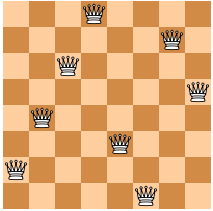

In [ ]:
# We know each queen must be in a different row.
# So, we represent each queen by a single integer: the column position
Queens = [ Int('Q_%i' % (i + 1)) for i in range(8) ]

# Each queen is in a column {1, ... 8 }
val_c = [ And(1 <= Queens[i], Queens[i] <= 8) for i in range(8) ]

# At most one queen per column
col_c = [ Distinct(Queens) ]

# Diagonal constraint
diag_c = [ If(i == j,
              True,
              And(Queens[i] - Queens[j] != i - j, Queens[i] - Queens[j] != j - i))
           for i in range(8) for j in range(i) ]

solve(val_c + col_c + diag_c)

# Application: Install Problem

The install problem consists of determining whether a new set of packages can be installed in a system. This application is based on the article OPIUM: Optimal Package Install/Uninstall Manager. Many packages depend on other packages to provide some functionality. Each distribution contains a meta-data file that explicates the requirements of each package of the distribution. The meta-data contains details like the name, version, etc. More importantly, it contains depends and conflicts clauses that stipulate which other packages should be on the system. The depends clauses stipulate which other packages must be present. The conflicts clauses stipulate which other packages must not be present.

The install problem can be easily solved using Z3. The idea is to define a Boolean variable for each package. This variable is true if the package must be in the system. If package a depends on packages b, c and z, we write:


In [ ]:
a, b, c, d, e, f, g, z = Bools('a b c d e f g z')

#DependsOn(a, [b, c, z])
#DependsOn is a simple Python function that creates Z3 constraints that capture the depends clause semantics.

def DependsOn(pack, deps):
   return And([ Implies(pack, dep) for dep in deps ])

#Thus, DependsOn(a, [b, c, z]) generates the constraint
# And(Implies(a, b), Implies(a, c), Implies(a, z))

print(DependsOn(a, [b, c, z]))

#That is, if users install package a, they must also install packages b, c and z.

#If package d conflicts with package e, we write Conflict(d, e). Conflict is also a simple Python function.

def Conflict(p1, p2):
    return Or(Not(p1), Not(p2))

# Conflict(d, e) generates the constraint Or(Not(d), Not(e)). 
# With these two functions, we can easily encode the example 
# in the Opium article (Section 2) in Z3Py as:

def DependsOn(pack, deps):
    return And([ Implies(pack, dep) for dep in deps ])

def Conflict(p1, p2):
    return Or(Not(p1), Not(p2))


solve(DependsOn(a, [b, c, z]),
      DependsOn(b, [d]),
      DependsOn(c, [Or(d, e), Or(f, g)]),
      Conflict(d, e),
      a, z)

In [ ]:
def DependsOn(pack, deps):
    return And([ Implies(pack, dep) for dep in deps ])

def Conflict(p1, p2):
    return Or(Not(p1), Not(p2))

a, b, c, d, e, f, g, z = Bools('a b c d e f g z')

solve(DependsOn(a, [b, c, z]),
      DependsOn(b, [d]),
      DependsOn(c, [Or(d, e), Or(f, g)]),
      Conflict(d, e),
      a, z)


In [ ]:
def install_check(*problem):
    s = Solver()
    s.add(*problem)
    if s.check() == sat:
        m = s.model()
        r = []
        for x in m:
            if is_true(m[x]):
                # x is a Z3 declaration
                # x() returns the Z3 expression
                # x.name() returns a string
                r.append(x())
        print(r)
    else:
        print("invalid installation profile")

print("Check 1")
install_check(DependsOn(a, [b, c, z]),
              DependsOn(b, [d]),
              DependsOn(c, [Or(d, e), Or(f, g)]),
              Conflict(d, e),
              Conflict(d, g),
              a, z)

print("Check 2")
install_check(DependsOn(a, [b, c, z]),
              #DependsOn(b, d),
              DependsOn(b, [d]),
              DependsOn(c, [Or(d, e), Or(f, g)]),
              Conflict(d, e),
              Conflict(d, g),
              a, z, g)


Special thanks to Peter Gragert for porting the original web-based guide to the jupyter notebook format.